## Regression model using TensorFlow and Keras for house price prediction

- This model is traned to predict house price on the basis of difference features such as living area, number of bedrooms, availibility of waterfront and so on. 
- I have performed Exploraotary data analysis to find the useful information from the data from which we can further find some valuable features during feature engineering
- I have created some useful features during feature engineering which will help in increasing the accuracy of the result
- I have used TensorFlow and Keras to train this regression model which will predict the price of a House for given inpuut features

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## 1. Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
%matplotlib inline

## 2. Importing Dataset

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 3. Exploratory Data Analysis


**3.1 Checking the data for any null values** 

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**3.2 Checking the statistical information of dataset**

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**3.3 Dropping the 'id' column from dataset**

In [6]:
df.drop('id',axis=1,inplace=True)

**3.4 Checking the correlation of target feature with independent features** 

In [7]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
zipcode         -0.053402
Name: price, dtype: float64

**3.5 Checking the correlation between independent variables**

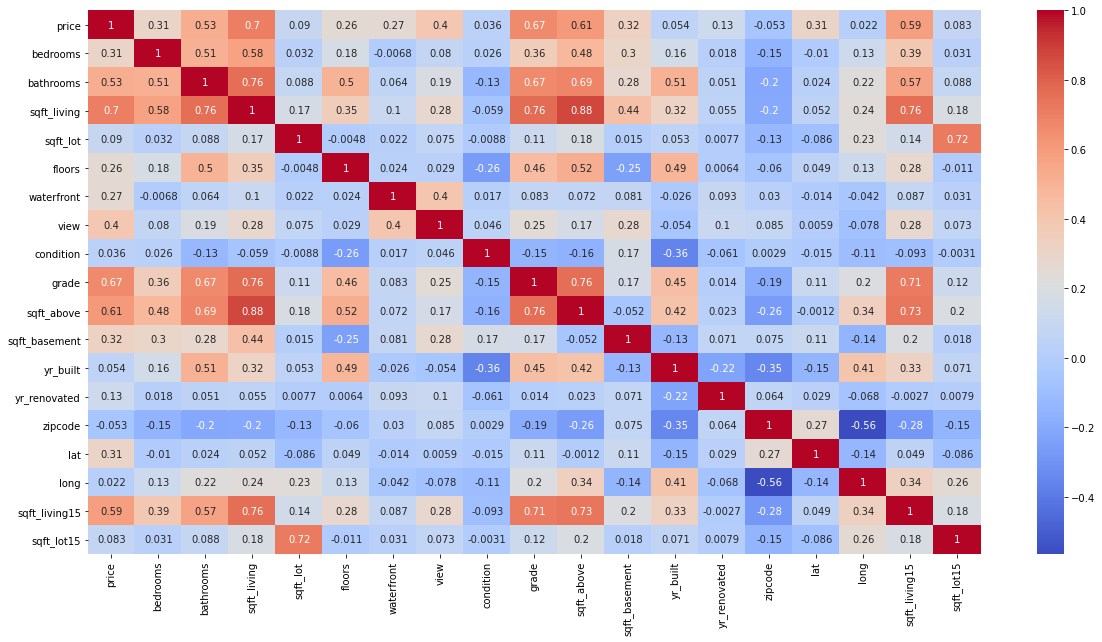

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap="coolwarm",annot= True)
plt.show()

**Observation**:Two variables sqft_living and sqft_above are highly correlated to each other

**3.6 Plotting the scatterplot between sqft_living and sqft_above** 

<AxesSubplot:xlabel='sqft_living', ylabel='sqft_above'>

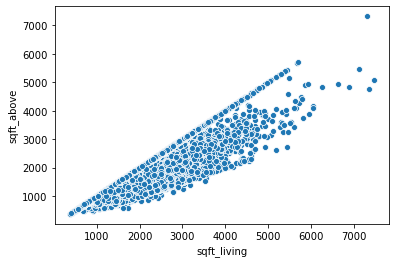

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(df2.sqft_living,df2.sqft_above,data= df2)

**3.7 Checking for outliers in Price** 

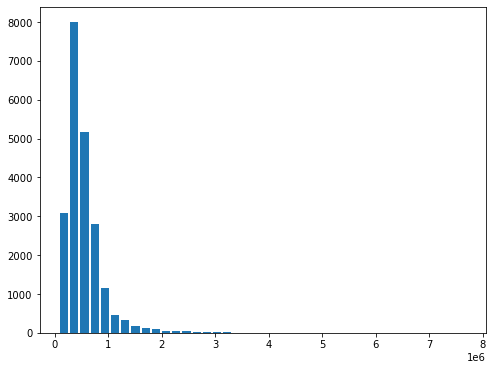

In [26]:
plt.figure(figsize=(8,6))
plt.hist(df.price, bins=40, rwidth=0.8)
plt.show()

**3.8 Removing the outliers using Zscore**

In [9]:
df['Zscore'] = (df["price"] - df["price"].mean())/df["price"].std()

In [10]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Zscore
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,-0.866696
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,-0.006251
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,-0.980751
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0.173405
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,-0.082469


In [11]:
df2 = df[(df.Zscore<2)&(df.Zscore>-2)]

In [12]:
df2.shape

(20756, 21)

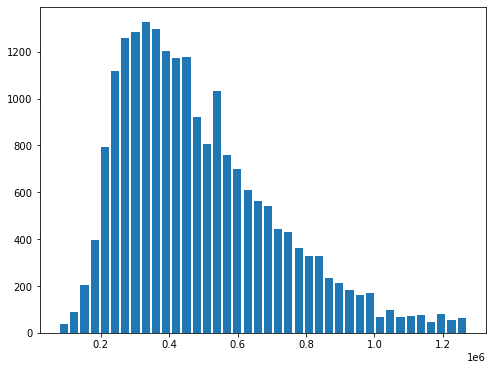

In [8]:
plt.figure(figsize=(8,6))
plt.hist(df2.price, bins=40, rwidth=0.8)
plt.show()

## 4. Feature Engineering

**4.1 Dropping 'sqft_above' feature as it is highly correlated with 'sqft_living'**

In [14]:
df2.drop('sqft_above',axis=1,inplace= True)

c:\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**4.2 setting the 'date' column to datetime format**

In [15]:
df2['date']= pd.to_datetime(df2['date'])

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**4.3 Preparing Month column from Datatime index** 

In [16]:
df2["Month"] = df2["date"].apply(lambda date:date.month) 

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**4.4 Preparing Year column from Datatime index** 

In [17]:
df2["Year"] = df2["date"].apply(lambda date:date.year) 

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df2.drop(['date','yr_renovated','zipcode','Zscore'],axis=1, inplace= True)

In [19]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,Month,Year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,47.6168,-122.045,1800,7503,2,2015


## 5. Model Training

**5.1 Preparing the variables with independent and dependent features**

In [20]:
X = df2.drop('price',axis=1).values
y = df2['price'].values

**5.2 Splitting the data in training and testing dataset** 

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**5.3 Scalling the data with Minmaxscaler** 

In [22]:
from sklearn.preprocessing import MinMaxScaler
scalling = MinMaxScaler()

In [23]:
X_train = scalling.fit_transform(X_train)

In [24]:
X_test = scalling.fit_transform(X_test)

In [25]:
X_train.shape

(14529, 17)

**5.4 importing Sequential,Dense, and Activation for model training**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation 

In [27]:
model = Sequential()


**5.5 Training the model with 3 hidden layers, 17 Nuerons per layer and relu as activation function**

In [28]:
model.add(Dense(17,activation = 'relu'))
model.add(Dense(17,activation = 'relu'))
model.add(Dense(17,activation = 'relu'))
model.add(Dense(17,activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

**5.6 Fitting the model on Training dataset and taking test dataset for validation**

In [29]:
model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
        batch_size=128,epochs=900)

Epoch 1/900
114/114 [==============================] - 1s 9ms/step - loss: 287529926656.0000 - val_loss: 289854423040.0000
Epoch 2/900
114/114 [==============================] - 1s 7ms/step - loss: 286637359104.0000 - val_loss: 286699487232.0000
Epoch 3/900
114/114 [==============================] - 0s 4ms/step - loss: 274380914688.0000 - val_loss: 257925005312.0000
Epoch 4/900
114/114 [==============================] - 1s 5ms/step - loss: 215176839168.0000 - val_loss: 159937658880.0000
Epoch 5/900
114/114 [==============================] - 0s 4ms/step - loss: 99430793216.0000 - val_loss: 49791807488.0000
Epoch 6/900
114/114 [==============================] - 0s 3ms/step - loss: 38224551936.0000 - val_loss: 34532077568.0000
Epoch 7/900
114/114 [==============================] - 0s 4ms/step - loss: 34026727424.0000 - val_loss: 34132207616.0000
Epoch 8/900
114/114 [==============================] - 0s 4ms/step - loss: 33586987008.0000 - val_loss: 33662115840.0000
Epoch 9/900
114/114 [===

114/114 [==============================] - 0s 4ms/step - loss: 15491240960.0000 - val_loss: 16682072064.0000
Epoch 69/900
114/114 [==============================] - 1s 6ms/step - loss: 15475891200.0000 - val_loss: 15856301056.0000
Epoch 70/900
114/114 [==============================] - 0s 3ms/step - loss: 15443950592.0000 - val_loss: 16528800768.0000
Epoch 71/900
114/114 [==============================] - 1s 8ms/step - loss: 15430207488.0000 - val_loss: 16132691968.0000
Epoch 72/900
114/114 [==============================] - 1s 5ms/step - loss: 15406988288.0000 - val_loss: 16334460928.0000
Epoch 73/900
114/114 [==============================] - 1s 6ms/step - loss: 15377875968.0000 - val_loss: 16386443264.0000
Epoch 74/900
114/114 [==============================] - 1s 8ms/step - loss: 15353990144.0000 - val_loss: 16842776576.0000
Epoch 75/900
114/114 [==============================] - 1s 7ms/step - loss: 15339430912.0000 - val_loss: 16647859200.0000
Epoch 76/900
114/114 [===============

114/114 [==============================] - 0s 4ms/step - loss: 14557930496.0000 - val_loss: 20110475264.0000
Epoch 135/900
114/114 [==============================] - 1s 5ms/step - loss: 14543993856.0000 - val_loss: 20862980096.0000
Epoch 136/900
114/114 [==============================] - 1s 8ms/step - loss: 14549626880.0000 - val_loss: 21099225088.0000
Epoch 137/900
114/114 [==============================] - 1s 6ms/step - loss: 14526989312.0000 - val_loss: 19960000512.0000
Epoch 138/900
114/114 [==============================] - 1s 5ms/step - loss: 14530179072.0000 - val_loss: 20398614528.0000
Epoch 139/900
114/114 [==============================] - 1s 8ms/step - loss: 14522866688.0000 - val_loss: 20323831808.0000
Epoch 140/900
114/114 [==============================] - 1s 7ms/step - loss: 14516498432.0000 - val_loss: 20660647936.0000
Epoch 141/900
114/114 [==============================] - 1s 5ms/step - loss: 14507689984.0000 - val_loss: 20710369280.0000
Epoch 142/900
114/114 [=======

114/114 [==============================] - 1s 7ms/step - loss: 14256627712.0000 - val_loss: 21914206208.0000
Epoch 201/900
114/114 [==============================] - 1s 7ms/step - loss: 14258926592.0000 - val_loss: 22675417088.0000
Epoch 202/900
114/114 [==============================] - 1s 5ms/step - loss: 14245990400.0000 - val_loss: 22096779264.0000
Epoch 203/900
114/114 [==============================] - 1s 6ms/step - loss: 14257582080.0000 - val_loss: 22776915968.0000
Epoch 204/900
114/114 [==============================] - 1s 5ms/step - loss: 14243478528.0000 - val_loss: 22976983040.0000
Epoch 205/900
114/114 [==============================] - 1s 8ms/step - loss: 14249153536.0000 - val_loss: 23255711744.0000
Epoch 206/900
114/114 [==============================] - 0s 4ms/step - loss: 14233032704.0000 - val_loss: 21601564672.0000
Epoch 207/900
114/114 [==============================] - 1s 5ms/step - loss: 14236344320.0000 - val_loss: 23037732864.0000
Epoch 208/900
114/114 [=======

114/114 [==============================] - 0s 3ms/step - loss: 14124935168.0000 - val_loss: 22852110336.0000
Epoch 267/900
114/114 [==============================] - 0s 3ms/step - loss: 14111060992.0000 - val_loss: 22489903104.0000
Epoch 268/900
114/114 [==============================] - 0s 3ms/step - loss: 14112424960.0000 - val_loss: 23124815872.0000
Epoch 269/900
114/114 [==============================] - 0s 3ms/step - loss: 14123400192.0000 - val_loss: 22284435456.0000
Epoch 270/900
114/114 [==============================] - 1s 12ms/step - loss: 14118175744.0000 - val_loss: 23364349952.0000
Epoch 271/900
114/114 [==============================] - 1s 6ms/step - loss: 14107333632.0000 - val_loss: 21937864704.0000
Epoch 272/900
114/114 [==============================] - 1s 5ms/step - loss: 14107650048.0000 - val_loss: 21892421632.0000
Epoch 273/900
114/114 [==============================] - 1s 6ms/step - loss: 14099002368.0000 - val_loss: 23503894528.0000
Epoch 274/900
114/114 [======

114/114 [==============================] - 0s 4ms/step - loss: 14019276800.0000 - val_loss: 21889648640.0000
Epoch 333/900
114/114 [==============================] - 0s 3ms/step - loss: 14020573184.0000 - val_loss: 21652078592.0000
Epoch 334/900
114/114 [==============================] - 0s 3ms/step - loss: 14026629120.0000 - val_loss: 21985433600.0000
Epoch 335/900
114/114 [==============================] - 0s 3ms/step - loss: 14014389248.0000 - val_loss: 21589497856.0000
Epoch 336/900
114/114 [==============================] - 0s 4ms/step - loss: 14023388160.0000 - val_loss: 21873723392.0000
Epoch 337/900
114/114 [==============================] - 0s 3ms/step - loss: 14013131776.0000 - val_loss: 21983989760.0000
Epoch 338/900
114/114 [==============================] - 0s 4ms/step - loss: 14014452736.0000 - val_loss: 22173718528.0000
Epoch 339/900
114/114 [==============================] - 0s 2ms/step - loss: 14015902720.0000 - val_loss: 21804675072.0000
Epoch 340/900
114/114 [=======

114/114 [==============================] - 1s 5ms/step - loss: 13934655488.0000 - val_loss: 22841247744.0000
Epoch 399/900
114/114 [==============================] - 0s 4ms/step - loss: 13956259840.0000 - val_loss: 21895178240.0000
Epoch 400/900
114/114 [==============================] - 0s 3ms/step - loss: 13945229312.0000 - val_loss: 21429913600.0000
Epoch 401/900
114/114 [==============================] - 0s 4ms/step - loss: 13934875648.0000 - val_loss: 21754150912.0000
Epoch 402/900
114/114 [==============================] - 0s 3ms/step - loss: 13935864832.0000 - val_loss: 21146167296.0000
Epoch 403/900
114/114 [==============================] - 0s 3ms/step - loss: 13926733824.0000 - val_loss: 22989053952.0000
Epoch 404/900
114/114 [==============================] - 0s 4ms/step - loss: 13939740672.0000 - val_loss: 20856915968.0000
Epoch 405/900
114/114 [==============================] - 0s 3ms/step - loss: 13928221696.0000 - val_loss: 22662852608.0000
Epoch 406/900
114/114 [=======

114/114 [==============================] - 0s 3ms/step - loss: 13867710464.0000 - val_loss: 22026319872.0000
Epoch 465/900
114/114 [==============================] - 0s 3ms/step - loss: 13858908160.0000 - val_loss: 20960047104.0000
Epoch 466/900
114/114 [==============================] - 0s 2ms/step - loss: 13870100480.0000 - val_loss: 20935938048.0000
Epoch 467/900
114/114 [==============================] - 0s 3ms/step - loss: 13860346880.0000 - val_loss: 22122067968.0000
Epoch 468/900
114/114 [==============================] - 0s 2ms/step - loss: 13862325248.0000 - val_loss: 21290418176.0000
Epoch 469/900
114/114 [==============================] - 0s 3ms/step - loss: 13852928000.0000 - val_loss: 21297358848.0000
Epoch 470/900
114/114 [==============================] - 0s 2ms/step - loss: 13865279488.0000 - val_loss: 21238130688.0000
Epoch 471/900
114/114 [==============================] - 0s 3ms/step - loss: 13860185088.0000 - val_loss: 21283379200.0000
Epoch 472/900
114/114 [=======

114/114 [==============================] - 0s 2ms/step - loss: 13763465216.0000 - val_loss: 21212422144.0000
Epoch 531/900
114/114 [==============================] - 0s 2ms/step - loss: 13763141632.0000 - val_loss: 20466319360.0000
Epoch 532/900
114/114 [==============================] - 0s 2ms/step - loss: 13765833728.0000 - val_loss: 21472147456.0000
Epoch 533/900
114/114 [==============================] - 0s 2ms/step - loss: 13771389952.0000 - val_loss: 21360623616.0000
Epoch 534/900
114/114 [==============================] - 1s 7ms/step - loss: 13783162880.0000 - val_loss: 21947070464.0000
Epoch 535/900
114/114 [==============================] - 1s 6ms/step - loss: 13771677696.0000 - val_loss: 21573107712.0000
Epoch 536/900
114/114 [==============================] - 1s 6ms/step - loss: 13767036928.0000 - val_loss: 20859901952.0000
Epoch 537/900
114/114 [==============================] - 1s 5ms/step - loss: 13762927616.0000 - val_loss: 21912997888.0000
Epoch 538/900
114/114 [=======

114/114 [==============================] - 0s 4ms/step - loss: 13685974016.0000 - val_loss: 20929382400.0000
Epoch 597/900
114/114 [==============================] - 0s 4ms/step - loss: 13682299904.0000 - val_loss: 19980261376.0000
Epoch 598/900
114/114 [==============================] - 0s 4ms/step - loss: 13679713280.0000 - val_loss: 21543931904.0000
Epoch 599/900
114/114 [==============================] - 0s 4ms/step - loss: 13698923520.0000 - val_loss: 20463403008.0000
Epoch 600/900
114/114 [==============================] - 1s 6ms/step - loss: 13680869376.0000 - val_loss: 19982985216.0000
Epoch 601/900
114/114 [==============================] - 1s 8ms/step - loss: 13676934144.0000 - val_loss: 20659982336.0000
Epoch 602/900
114/114 [==============================] - 1s 5ms/step - loss: 13676338176.0000 - val_loss: 20953268224.0000
Epoch 603/900
114/114 [==============================] - 1s 6ms/step - loss: 13683389440.0000 - val_loss: 21013757952.0000
Epoch 604/900
114/114 [=======

114/114 [==============================] - 0s 2ms/step - loss: 13618629632.0000 - val_loss: 20720928768.0000
Epoch 663/900
114/114 [==============================] - 0s 3ms/step - loss: 13617862656.0000 - val_loss: 21417115648.0000
Epoch 664/900
114/114 [==============================] - 0s 2ms/step - loss: 13611538432.0000 - val_loss: 21695244288.0000
Epoch 665/900
114/114 [==============================] - 0s 2ms/step - loss: 13617725440.0000 - val_loss: 20835567616.0000
Epoch 666/900
114/114 [==============================] - 0s 3ms/step - loss: 13613050880.0000 - val_loss: 20770271232.0000
Epoch 667/900
114/114 [==============================] - 0s 3ms/step - loss: 13610788864.0000 - val_loss: 20915933184.0000
Epoch 668/900
114/114 [==============================] - 0s 2ms/step - loss: 13612303360.0000 - val_loss: 21173911552.0000
Epoch 669/900
114/114 [==============================] - 1s 8ms/step - loss: 13603056640.0000 - val_loss: 22267650048.0000
Epoch 670/900
114/114 [=======

114/114 [==============================] - 1s 5ms/step - loss: 13558396928.0000 - val_loss: 21163673600.0000
Epoch 729/900
114/114 [==============================] - 0s 4ms/step - loss: 13551387648.0000 - val_loss: 21583611904.0000
Epoch 730/900
114/114 [==============================] - 0s 4ms/step - loss: 13551432704.0000 - val_loss: 21212446720.0000
Epoch 731/900
114/114 [==============================] - 0s 4ms/step - loss: 13549290496.0000 - val_loss: 21523181568.0000
Epoch 732/900
114/114 [==============================] - 1s 7ms/step - loss: 13565308928.0000 - val_loss: 20491595776.0000
Epoch 733/900
114/114 [==============================] - 1s 6ms/step - loss: 13556704256.0000 - val_loss: 21067585536.0000
Epoch 734/900
114/114 [==============================] - 1s 8ms/step - loss: 13544231936.0000 - val_loss: 21071452160.0000
Epoch 735/900
114/114 [==============================] - 1s 5ms/step - loss: 13552408576.0000 - val_loss: 20619102208.0000
Epoch 736/900
114/114 [=======

114/114 [==============================] - 0s 3ms/step - loss: 13505119232.0000 - val_loss: 20447608832.0000
Epoch 795/900
114/114 [==============================] - 0s 3ms/step - loss: 13514127360.0000 - val_loss: 20994904064.0000
Epoch 796/900
114/114 [==============================] - 0s 4ms/step - loss: 13499880448.0000 - val_loss: 20291301376.0000
Epoch 797/900
114/114 [==============================] - 0s 2ms/step - loss: 13505350656.0000 - val_loss: 20944842752.0000
Epoch 798/900
114/114 [==============================] - 0s 2ms/step - loss: 13496568832.0000 - val_loss: 20676229120.0000
Epoch 799/900
114/114 [==============================] - 1s 8ms/step - loss: 13499127808.0000 - val_loss: 20283344896.0000
Epoch 800/900
114/114 [==============================] - 1s 5ms/step - loss: 13503388672.0000 - val_loss: 20366770176.0000
Epoch 801/900
114/114 [==============================] - 1s 6ms/step - loss: 13508970496.0000 - val_loss: 22363801600.0000
Epoch 802/900
114/114 [=======

114/114 [==============================] - 1s 6ms/step - loss: 13454972928.0000 - val_loss: 21369442304.0000
Epoch 861/900
114/114 [==============================] - 1s 8ms/step - loss: 13452532736.0000 - val_loss: 20820768768.0000
Epoch 862/900
114/114 [==============================] - 1s 5ms/step - loss: 13434613760.0000 - val_loss: 21223499776.0000
Epoch 863/900
114/114 [==============================] - 1s 5ms/step - loss: 13449226240.0000 - val_loss: 20789964800.0000
Epoch 864/900
114/114 [==============================] - 1s 6ms/step - loss: 13436513280.0000 - val_loss: 20673323008.0000
Epoch 865/900
114/114 [==============================] - 1s 7ms/step - loss: 13444613120.0000 - val_loss: 20528201728.0000
Epoch 866/900
114/114 [==============================] - 1s 7ms/step - loss: 13448731648.0000 - val_loss: 20685965312.0000
Epoch 867/900
114/114 [==============================] - 1s 5ms/step - loss: 13440223232.0000 - val_loss: 20790460416.0000
Epoch 868/900
114/114 [=======

In [30]:
loss = pd.DataFrame(model.history.history)

**5.7 Pltting the Training and validation error hystory** 

<AxesSubplot:>

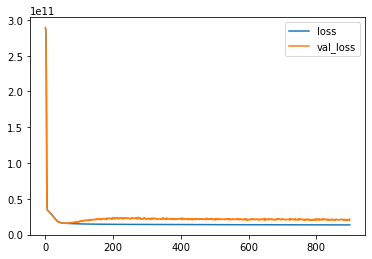

In [31]:
loss.plot()

## 6. Model Evaluation

Importing mean_squared_error,mean_absolute_error,explained_variance_score for model evaluation

In [32]:
y_predict = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [34]:
mean_absolute_error(y_test,y_predict)

104153.59466712501

In [35]:
mean_squared_error(y_test,y_predict)

21415418342.137203

In [36]:
explained_variance_score(y_test,y_predict)

0.7067828574736419

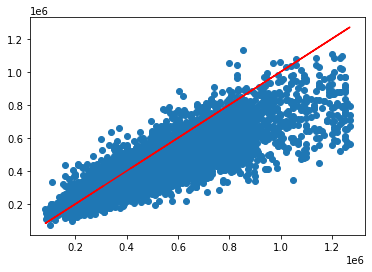

In [38]:
# Actual predictions
plt.scatter(y_test,y_predict)

# Perfect predictions
plt.plot(y_test,y_test,'r')

## 7. Prediction of price for new data

In [39]:
single_house = df2.drop('price',axis=1).iloc[0]

In [40]:
single_house = scalling.transform(single_house.values.reshape(-1, 17))

In [41]:
model.predict(single_house)

array([[228191.02]], dtype=float32)

## 8. Saving the model

In [46]:
from tensorflow.keras.models import load_model

In [48]:
model.save('House_price_prediction.h5') 

In [49]:
saved_model = load_model('House_price_prediction.h5')

In [50]:
saved_model.predict(single_house)

array([[228191.02]], dtype=float32)